In [38]:
# Initializing the app
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('wtam186_Iteration4').getOrCreate()

In [39]:
# Loading dataset
df = spark.read.csv('./Datasets/COVID-19 Survey Student Responses.csv', header='true')
df

DataFrame[ID: string, Region of residence: string, Age of Subject: string, Time spent on Online Class: string, Rating of Online Class experience: string, Medium for online class: string, Time spent on self study: string, Time spent on fitness: string, Time spent on sleep: string, Time spent on social media: string, Prefered social media platform: string, Time spent on TV: string, Number of meals per day: string, Change in your weight: string, Health issue during lockdown: string, Stress busters: string, Time utilized: string, Do you find yourself more connected with your family, close friends , relatives  ?: string, What you miss the most: string]

## Step 2.1: Initial Inspection on the dataset

In [40]:
# Understanding the data by showing the top 10 rows and displaying specific columns in a clear and tidy format (to avoid output being truncated)
df.select("ID", "Region of residence", "Age of Subject", "Time spent on Online Class", "Rating of Online Class experience").show(10)
df.select("Medium for online class", "Time spent on self study", "Time spent on fitness", "Time spent on sleep").show(10)
df.select("Time spent on social media", "Prefered social media platform", "Time spent on TV", "Number of meals per day").show(10)
df.select("Change in your weight", "Health issue during lockdown", "Stress busters", "Time utilized").show(10)
df.select("Do you find yourself more connected with your family, close friends , relatives  ?", "What you miss the most").show(10)


+---+-------------------+--------------+--------------------------+---------------------------------+
| ID|Region of residence|Age of Subject|Time spent on Online Class|Rating of Online Class experience|
+---+-------------------+--------------+--------------------------+---------------------------------+
| R1|          Delhi-NCR|            21|                         2|                             Good|
| R2|          Delhi-NCR|            21|                         0|                        Excellent|
| R3|          Delhi-NCR|            20|                         7|                        Very poor|
| R4|          Delhi-NCR|            20|                         3|                        Very poor|
| R5|          Delhi-NCR|            21|                         3|                             Good|
| R6|          Delhi-NCR|            21|                         0|                        Very poor|
| R7|          Delhi-NCR|            19|                         2|               

## Step 2.2 Describing the data

In [41]:
# Obtaining the data type of each column
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Region of residence: string (nullable = true)
 |-- Age of Subject: string (nullable = true)
 |-- Time spent on Online Class: string (nullable = true)
 |-- Rating of Online Class experience: string (nullable = true)
 |-- Medium for online class: string (nullable = true)
 |-- Time spent on self study: string (nullable = true)
 |-- Time spent on fitness: string (nullable = true)
 |-- Time spent on sleep: string (nullable = true)
 |-- Time spent on social media: string (nullable = true)
 |-- Prefered social media platform: string (nullable = true)
 |-- Time spent on TV: string (nullable = true)
 |-- Number of meals per day: string (nullable = true)
 |-- Change in your weight: string (nullable = true)
 |-- Health issue during lockdown: string (nullable = true)
 |-- Stress busters: string (nullable = true)
 |-- Time utilized: string (nullable = true)
 |-- Do you find yourself more connected with your family, close friends , relatives  ?: string (nu

In [42]:
df.count()

1182

In [43]:
len(df.columns)

19

## Step 2.3: Data exploration

In [44]:
!pip3 install seaborn
!pip3 install --upgrade pip
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement 

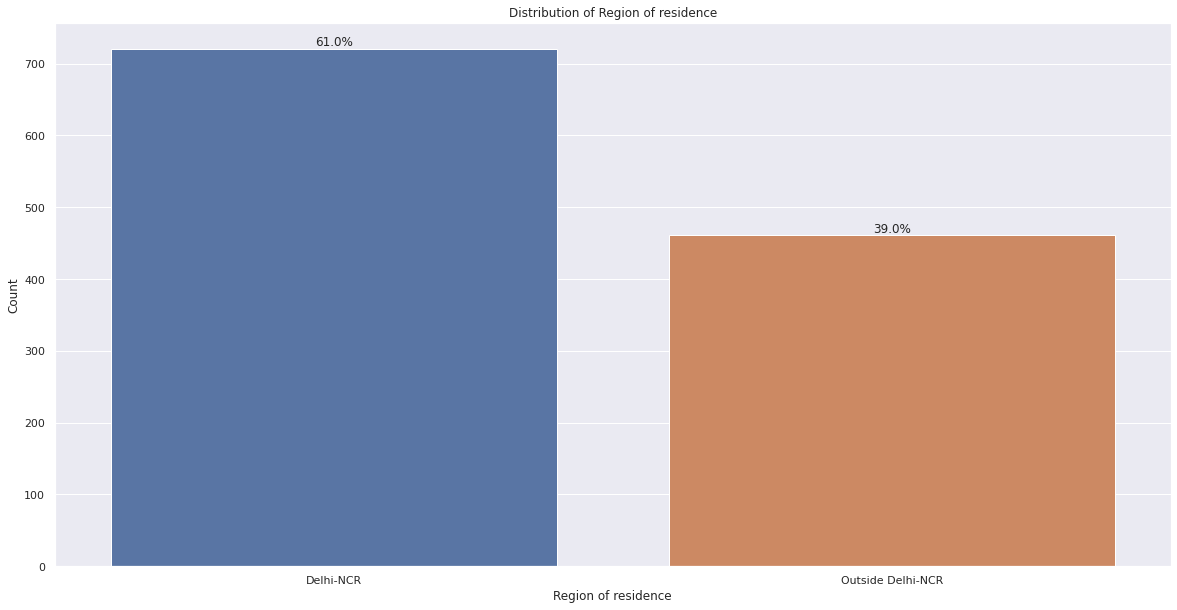

In [45]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the histogram for the 'Region of residence' column
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot

dfpd=pd.read_csv('./Datasets/COVID-19 Survey Student Responses.csv')

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Region of residence', data=dfpd)
# Calculate percentages
total = len(dfpd)
counts = dfpd['Region of residence'].value_counts()
percentages = counts / total * 100
# Annotate the bars with percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{percentages[i]:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Region of residence')
plt.ylabel('Count')
plt.title('Distribution of Region of residence')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


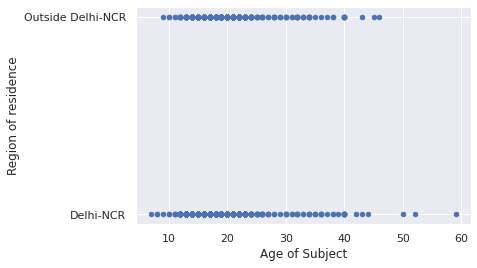

In [46]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the scatter plot
dfpd.plot(kind='scatter', x='Age of Subject', y='Region of residence')
plt.show()

In [47]:
### Use pyspark to count both null and missing values
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-------------------+--------------+--------------------------+---------------------------------+-----------------------+------------------------+---------------------+-------------------+--------------------------+------------------------------+----------------+-----------------------+---------------------+----------------------------+--------------+-------------+----------------------------------------------------------------------------------+----------------------+
| ID|Region of residence|Age of Subject|Time spent on Online Class|Rating of Online Class experience|Medium for online class|Time spent on self study|Time spent on fitness|Time spent on sleep|Time spent on social media|Prefered social media platform|Time spent on TV|Number of meals per day|Change in your weight|Health issue during lockdown|Stress busters|Time utilized|Do you find yourself more connected with your family, close friends , relatives  ?|What you miss the most|
+---+-------------------+--------------+----

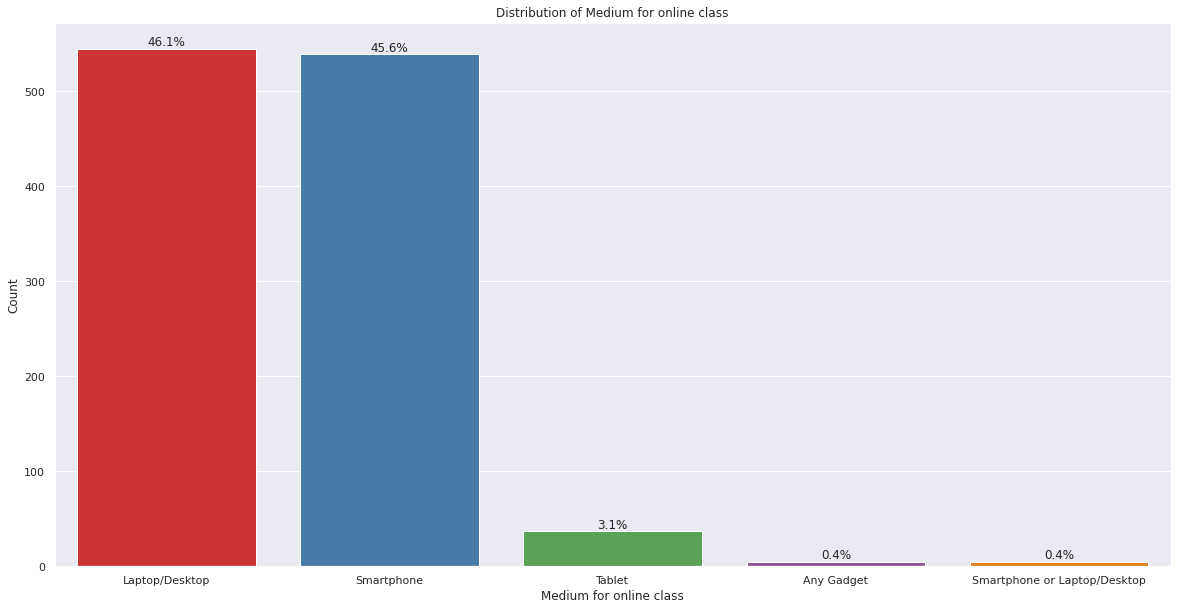

In [48]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the bar chart
sns.set(style='darkgrid')
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Medium for online class', data=dfpd, palette='Set1') # Change the palette for visualization
# Calculate percentages
total = len(dfpd)
counts = dfpd['Medium for online class'].value_counts()
percentages = counts / total * 100
# Annotate the bars with percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{percentages[i]:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Medium for online class')
plt.ylabel('Count')
plt.title('Distribution of Medium for online class')
plt.show()

In [49]:
#'df' is PySpark DataFrame

# Extract unique values from the 'Time spent on TV' column
unique_times = df.select('Time spent on TV').distinct()

# Count the occurrences of each unique value
time_counts = df.groupBy('Time spent on TV').agg(count('*').alias('count'))

# Collect the results and print them
print("Unique values of time spent on TV:")
unique_times.show(30)

print("\nCounts of each unique time:")
time_counts.show(30)

Unique values of time spent on TV:
+----------------+
|Time spent on TV|
+----------------+
|               7|
|            0.75|
|              15|
|             0.3|
|               3|
|               8|
|            0.25|
|             4.5|
|               0|
|             2.5|
|               5|
|               n|
|             3.5|
|               6|
|             0.5|
|             0.6|
|               N|
|             0.1|
|             1.5|
|               1|
|               4|
|                |
|           No tv|
|               2|
|             0.4|
+----------------+


Counts of each unique time:
+----------------+-----+
|Time spent on TV|count|
+----------------+-----+
|               7|    2|
|            0.75|    1|
|              15|    1|
|             0.3|   12|
|               3|   50|
|               8|    2|
|            0.25|    1|
|             4.5|    2|
|               0|  441|
|             2.5|    2|
|               5|   10|
|               n|    1|
|        

In [50]:
#'df' is PySpark DataFrame

# Extract unique values from the 'What you miss the most' column
unique_times = df.select('What you miss the most').distinct()

# Collect the results and print them
print("Unique values of What you miss the most:")
unique_times.show(80)

Unique values of What you miss the most:
+----------------------+
|What you miss the most|
+----------------------+
|  school, relatives...|
|  Eating outside an...|
|  Roaming around fr...|
|                   Job|
|                   ALL|
|  Friends,Romaing a...|
|  Travelling & Friends|
|              Nothing |
|            everything|
|               Family |
|     Previous mistakes|
|  Friends and roami...|
|        School/college|
|  Friends, relative...|
|  I have missed not...|
|   Taking kids to park|
|  Nah, this is my u...|
|    Badminton in court|
|               NOTHING|
|         All the above|
|                     .|
|              Internet|
|   Going to the movies|
|                Family|
|   School and friends.|
|               nothing|
|          Only friends|
|                   All|
|           Normal life|
|       To stay alone. |
|               Playing|
|            Colleagues|
|             All above|
|     All of the above |
|     My normal routine|
|  School

In [51]:
df2 = df.withColumn("Residential Region", when(df["Region of residence"] == "Delhi-NCR", 1).otherwise(0))

region = df2.select("Region of residence", "Residential Region")
region.show()

+-------------------+------------------+
|Region of residence|Residential Region|
+-------------------+------------------+
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|  Outside Delhi-NCR|                 0|
|          Delhi-NCR|                 1|
|  Outside Delhi-NCR|                 0|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|  Outside Delhi-NCR|                 0|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|  Outside Delhi-NCR|                 0|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
|          Delhi-NCR|                 1|
+-------------------+------------------+
only showing top

In [52]:
# Issues with installing sklearn (this is a python library and not pyspark)
# So we also installed sciki-learn
!pip3 install sklearn
!pip3 install --upgrade pip
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement 

In [53]:
dfpd2 = df2

In [54]:
#2.3.1. EXPLORING THE MOST IMPORTANT VARIABLES. Attempt 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

dropColumnsX1 = ["ID", "Region of residence", "Residential Region"]
X1 = dfpd2.drop(*dropColumnsX1)

dropColumnsy1 = ["ID", "Region of residence"]
y1 = dfpd2.select("Residential Region").drop(*dropColumnsy1)

#Produce and print scores for each categorical features in the data set
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X1, y1)
#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit.scores_[i]))
#Visualising the scores
#Get the indices sorted by most important to least important
indices = np.argsort(sf_fit.scores_)[::-1]
#Top 15 feature names
features = []
for i in range(15):
    features.append(X1.columns[indices[i]])
#Plotting top 15 features
plt.figure(figsize=(35, 3))
plt.bar(features, sf_fit.scores_[indices[range(15)]], color='r', align='center',
width=0.3)
plt.xticks(rotation=75)
plt.show()

ValueError: Expected 2D array, got scalar array instead:
array=DataFrame[Age of Subject: string, Time spent on Online Class: string, Rating of Online Class experience: string, Medium for online class: string, Time spent on self study: string, Time spent on fitness: string, Time spent on sleep: string, Time spent on social media: string, Prefered social media platform: string, Time spent on TV: string, Number of meals per day: string, Change in your weight: string, Health issue during lockdown: string, Stress busters: string, Time utilized: string, Do you find yourself more connected with your family, close friends , relatives  ?: string, What you miss the most: string].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [55]:
#2.3.1. EXPLORING THE MOST IMPORTANT VARIABLES. Attempt 2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

X1 = dfpd.drop(["ID", "Region of residence"], axis=1)

y1 = dfpd["Region of residence"]


transformDummies = pd.get_dummies(dfpd, drop_first=True)

#Produce and print scores for each categorical features in the data set
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X1, y1)
#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit.scores_[i]))
#Visualising the scores
#Get the indices sorted by most important to least important
indices = np.argsort(sf_fit.scores_)[::-1]
#Top 15 feature names
features = []
for i in range(15):
    features.append(X1.columns[indices[i]])
#Plotting top 15 features
plt.figure(figsize=(35, 3))
plt.bar(features, sf_fit.scores_[indices[range(15)]], color='r', align='center',
width=0.3)
plt.xticks(rotation=75)
plt.show()

ValueError: could not convert string to float: 'Good'

## Step 2.4: Verifying the Data Quality

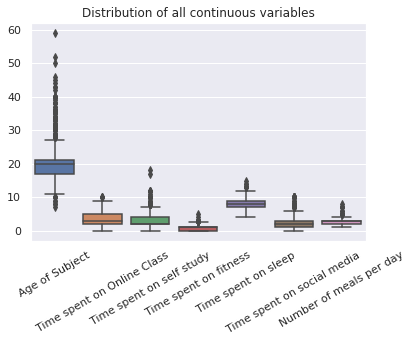

In [56]:
#PySpark doesn't provide as extensive plotting capabilities as Pandas and Matplotlib
#So could not use pyspark to create the bar chart
import seaborn as sns
sns.boxplot(data=dfpd)
plt.title('Distribution of all continuous variables')
plt.xticks(rotation=30)
plt.show()

# Step 3: Data Preparation. For step 3, we will use Python (issues identified in the previous iteration that should be addressed) and PySpark (couldn't identify those issues efficiently when running equivalent functions) for consequent steps, which we will download the cleaned dataset then re-upload it for feature selection and perform data mining analysis.

## Step 3.2: Data Cleaning

In [57]:
dfpd.info() #Pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [58]:
df2.show() #PySpark

+---+-------------------+--------------+--------------------------+---------------------------------+-----------------------+------------------------+---------------------+-------------------+--------------------------+------------------------------+----------------+-----------------------+---------------------+----------------------------+--------------------+-------------+----------------------------------------------------------------------------------+----------------------+------------------+
| ID|Region of residence|Age of Subject|Time spent on Online Class|Rating of Online Class experience|Medium for online class|Time spent on self study|Time spent on fitness|Time spent on sleep|Time spent on social media|Prefered social media platform|Time spent on TV|Number of meals per day|Change in your weight|Health issue during lockdown|      Stress busters|Time utilized|Do you find yourself more connected with your family, close friends , relatives  ?|What you miss the most|Residential Re

In [59]:
df2.printSchema() #PySpark

root
 |-- ID: string (nullable = true)
 |-- Region of residence: string (nullable = true)
 |-- Age of Subject: string (nullable = true)
 |-- Time spent on Online Class: string (nullable = true)
 |-- Rating of Online Class experience: string (nullable = true)
 |-- Medium for online class: string (nullable = true)
 |-- Time spent on self study: string (nullable = true)
 |-- Time spent on fitness: string (nullable = true)
 |-- Time spent on sleep: string (nullable = true)
 |-- Time spent on social media: string (nullable = true)
 |-- Prefered social media platform: string (nullable = true)
 |-- Time spent on TV: string (nullable = true)
 |-- Number of meals per day: string (nullable = true)
 |-- Change in your weight: string (nullable = true)
 |-- Health issue during lockdown: string (nullable = true)
 |-- Stress busters: string (nullable = true)
 |-- Time utilized: string (nullable = true)
 |-- Do you find yourself more connected with your family, close friends , relatives  ?: string (nu

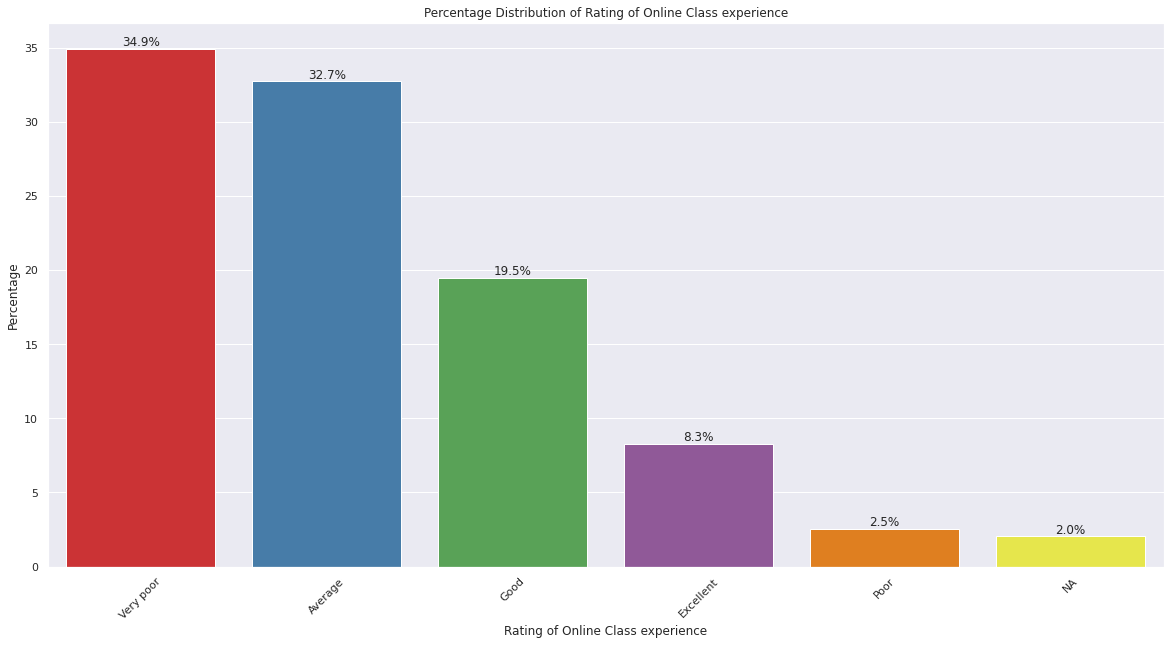

Very poor    413
Average      387
Good         230
Excellent     98
Poor          30
NA            24
Name: Rating of Online Class experience, dtype: int64


In [61]:
#Rating of Online Class experience
# Replace 'NaN' with 'NA' to ensure consistency in labeling
dfpd['Rating of Online Class experience'].replace(np.nan, 'NA', inplace=True)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=percentages.index, y=percentages.values, palette='Set1')
# Calculate percentages
total1 = len(dfpd)
counts1 = dfpd['Rating of Online Class experience'].value_counts()
percentages = counts1 / total1 * 100
# Create a bar plot for percentage distribution
for p, label in zip(ax.patches, percentages.values):
    height = p.get_height()
    ax.annotate(f'{label:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Rating of Online Class experience')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Rating of Online Class experience')
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
plt.show()
print(dfpd['Rating of Online Class experience'].value_counts())

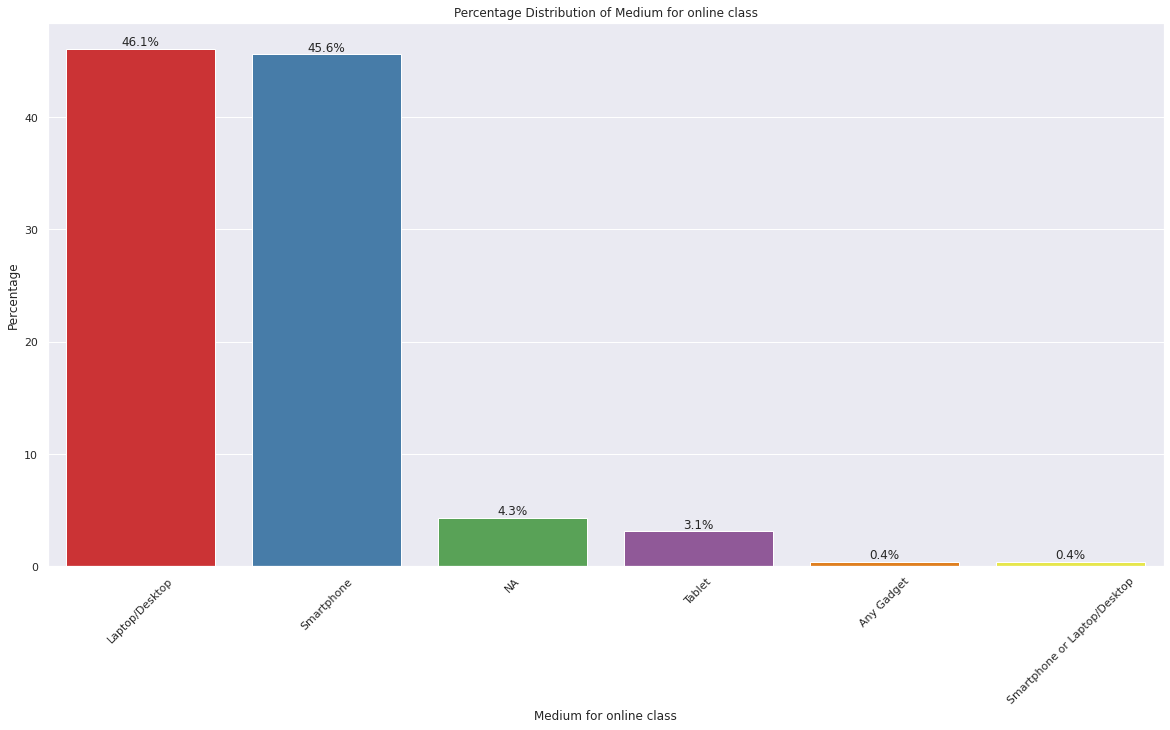

Laptop/Desktop                  545
Smartphone                      539
NA                               51
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
Name: Medium for online class, dtype: int64


In [63]:
#Medium for online class
# Replace 'NaN' with 'NA' to ensure consistency in labeling
dfpd['Medium for online class'].replace(np.nan, 'NA', inplace=True)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=percentages.index, y=percentages.values, palette='Set1')
# Calculate percentages
total2 = len(dfpd)
counts2 = dfpd['Medium for online class'].value_counts()
percentages = counts2 / total2 * 100
# Create a bar plot for percentage distribution
for p, label in zip(ax.patches, percentages.values):
    height = p.get_height()
    ax.annotate(f'{label:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Medium for online class')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Medium for online class')
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
plt.show()
print(dfpd['Medium for online class'].value_counts())

In [64]:
#Reclassifying Time spent on TV
replacing_map = {'Time spent on TV': {'n': '0', 'N': '0', 'No tv': '0', ' ': '0',}}
dfpd.replace(replacing_map, inplace=True)
# unique_time = dfpd['Time spent on TV'].unique()
time_counts = dfpd['Time spent on TV'].value_counts()
#Print unique rows time
# print("Unique values of time spent on tv:")
# for time in unique_time:
#     print(time)
#Print counts of each unique rows of time
print("\nCounts of each unique time: ")
print(time_counts)


Counts of each unique time: 
0       454
1       306
2       207
0.5      78
3        50
4        24
1.5      14
0.3      12
5        10
6         9
0.1       4
4.5       2
7         2
8         2
2.5       2
0.25      1
0.6       1
15        1
0.75      1
3.5       1
0.4       1
Name: Time spent on TV, dtype: int64


In [65]:
dfpd["Time spent on TV"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1182 entries, 0 to 1181
Series name: Time spent on TV
Non-Null Count  Dtype 
--------------  ----- 
1182 non-null   object
dtypes: object(1)
memory usage: 9.4+ KB


In [66]:
dfpd["Time spent on TV"] = dfpd["Time spent on TV"].astype('float64') 
print(dfpd.dtypes)

ID                                                                                     object
Region of residence                                                                    object
Age of Subject                                                                          int64
Time spent on Online Class                                                            float64
Rating of Online Class experience                                                      object
Medium for online class                                                                object
Time spent on self study                                                              float64
Time spent on fitness                                                                 float64
Time spent on sleep                                                                   float64
Time spent on social media                                                            float64
Prefered social media platform                              

In [67]:
# Replace function on What do you miss the most column
replacing_map1 = {'What you miss the most':
    {'all': "All Options",
    'All': "All Options",
    'ALL': "All Options",
    'All above': "All Options",
    'all of the above': "All Options",
    'All of the above': "All Options",
    'All of them': "All Options",
    'All the above': "All Options",
    'everything': "All Options",
    'Badminton in court': "Sports and Activities",
    'Being social': "Social Interactions",
    'Colleagues': "Social Interactions",
    'Eating outside': "Dining and Entertainment",
    'Eating outside and friends.': "Dining and Entertainment",
    'Family': "Family",
    'Football': "Sports and Activities",
    'Friends , relatives': "Social Interactions",
    'Friends and roaming around freely': "Social Interactions",
    'Friends and School': "Social Interactions",
    'Friends, relatives & travelling': "Social Interactions",
    'Friends,Romaing and traveling': "Social Interactions",
    'Going to the movies': "Entertainment",
    'Gym': "Sports and Activities",
    'I have missed nothing': "Personal Reflection",
    'Internet': "Technology and Media",
    'Job': "Work and Career",
    'Metro': "Transportation",
    'My normal routine': "Personal Routine",
    'Nah, this is my usual lifestyle anyway, just being lazy....':
    "Personal Reflection",
    'Normal life': "Personal Routine",
    'nothing': "Personal Reflection",
    'Nothing': "Personal Reflection",
    'NOTHING': "Personal Reflection",
    'Nothing this is my usual life': "Personal Reflection",
    'Only friends': "Social Interactions",
    'Playing': "Sports and Activities",
    'Previous mistakes': "Personal Reflection",
    'Roaming around freely': "Personal Exploration",
    'School and friends.': "Education and Social Interactions",
    'School and my school friends': "Education and Social Interactions",
    'school, relatives and friends': "Education and Social Interactions",
    'School/college': "Education",
    'Taking kids to park': "Family and Activities",
    'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends': "Family and Social Interactions",
    'To stay alone.': "Personal Reflection",
    'Travelling': "Travel and Exploration",
    'Travelling & Friends': "Travel and Social Interactions",}}

dfpd['What you miss the most'] = dfpd['What you miss the most'].str.strip()

dfpd.replace(replacing_map1, inplace=True)
unique_time1 = dfpd['What you miss the most'].unique()
time_counts1 = dfpd['What you miss the most'].value_counts()
#Print unique rows miss
print("Unique values of What you miss the most:")
for time1 in unique_time1:
    print(time1)
#Print counts of each unique rows of miss
print("\nCounts of each unique miss: ")
print(time_counts1)

Unique values of What you miss the most:
Education
Personal Exploration
Travel and Exploration
Social Interactions
Dining and Entertainment
Work and Career
Personal Reflection
Sports and Activities
All Options
Family and Activities
Technology and Media
Entertainment
Education and Social Interactions
Family
Personal Routine
Family and Social Interactions
.
Travel and Social Interactions
Transportation

Counts of each unique miss: 
Education                            379
Social Interactions                  297
Travel and Exploration               183
Personal Exploration                 149
Dining and Entertainment             105
All Options                           26
Personal Reflection                   21
Sports and Activities                  7
Education and Social Interactions      3
Personal Routine                       2
Family                                 2
Travel and Social Interactions         1
.                                      1
Family and Social Interactions   

In [68]:
#Filtering out the value (with a full stop)
dfpd = dfpd[dfpd['What you miss the most'] != '.']
print(dfpd['What you miss the most'].unique())

dfpd.info()

['Education' 'Personal Exploration' 'Travel and Exploration'
 'Social Interactions' 'Dining and Entertainment' 'Work and Career'
 'Personal Reflection' 'Sports and Activities' 'All Options'
 'Family and Activities' 'Technology and Media' 'Entertainment'
 'Education and Social Interactions' 'Family' 'Personal Routine'
 'Family and Social Interactions' 'Travel and Social Interactions'
 'Transportation']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1181 non-null   object 
 1   Region of residence                                                                 1181 non-null   object 
 2   Age of Subject                 

In [69]:
#Replace function on Stress busters column
replacing_map2 = {'Stress busters':
   {'working out and some physical activity': "Exercise",
    'workout': "Exercise",
    'Workout': "Exercise",
    'Workout and listening music': "Exercise",
    'Running': "Exercise",
    'I run': "Exercise",
    'Gym': "Exercise",
    'Exercise': "Exercise",
    'Exercising': "Exercise",
    'Dancing': "Exercise",
    'Cardio': "Exercise",
    'Drawing': "Leisure and Entertainment",
    'drawing': "Leisure and Entertainment",
    'Drawing and painting and sketching': "Leisure and Entertainment",
    'Drawing, painting': "Leisure and Entertainment",
    'Business': "Work",
    'By engaging in my work.': "Work",
    'Work': "Work",
    'watching movies,reading books,games,listening to music,sleep,dancing': "Leisure and Entertainment",
    'Watching orgasm releasing videos': "Watching videos",
    'Watching ted talks and music and books': "Watching videos",
    'Watching web series': "Watching videos",
    'Watching YouTube': "Watching videos",
    'Web Series': "Watching videos",
    'Youtube': "Watching videos",
    'live stream watching': 'Watching videos',
    'Anime Manga': 'Watching videos',
    'Talk with childhood friends.': "Communication with others",
    'Talking': "Communication with others",
    'Talking to friends': "Communication with others",
    'Talking to your relatives': "Communication with others",
    'Talking with friends': "Communication with others",
    'Calling friends': "Communication with others",
    'With a friend': "Communication with others",
    'Many among these': "Many options",
    'Many of these': "Many options",
    'Online gaming': "Gaming",
    'Online gaming , surfing and listening to music': "Leisure and Entertainment",
    'Online surfing': "Gaming",
    'pubg': "Gaming",
    'I play Rubiks cube': "Gaming",
    'Painting': "Leisure and Entertainment",
    'Painting,. Sewing': "Leisure and Entertainment",
    'Sleep': "Sleeping",
    'Sleeping': "Sleeping",
    'Sleeping, Online games': "Sleeping",
    'listening music, motion design, graphic design, sleeping':
    "Leisure and Entertainment",
    'All reading books watching web series listening to music and talking to friends': "Leisure and Entertainment",
    'Sketching': "Leisure and Entertainment",
    'Sketching and writing': "Leisure and Entertainment",
    'sketching,reading books,meditation,songs': "Leisure and Entertainment",
    'sketching,reading books,meditation,songs': "Leisure and Entertainment",
    'Reading': "Reading books",
    'Reading books': "Reading books",
    'Reading books, music, exercise': "Leisure and Entertainment",
    'Poetry, writing books and novels , listening to music too':
    "Leisure and Entertainment",
    'Listening to music and reading books both .': "Leisure and Entertainment",
    'listening to music,reading books and dancing.': "Leisure and Entertainment",
    'Netflix, Friends and Books': "Leisure and Entertainment",
    'Both listining music and scrolling down social media': "Leisure and Entertainment",
    'Cricket': "Sports and games",
    'Football': "Sports and games",
    'Indoor Games': "Sports and games",
    'Sports': "Sports and games",
    'Playing': "Sports and games",
    'Social Media': "Social Media",
    'Scrolling through social media': "Social Media",
    'Writing': "Leisure and Entertainment",
    'Writing my own Comics & novels': "Leisure and Entertainment",
    'no stress': "No stress",
    'I have no problem of stress': "No stress",
    'Dont get distreessed': "No stress",
    'No able to reduce the stress': "Unable to reduce stress",
    'I cant de-stress myslef': "Unable to reduce stress",
    'singing': "Leisure and Entertainment",
    'Listening to music': "Leisure and Entertainment",
    'Taking with parents': "Communication with others",
    'Crying': "Unable to reduce stress",
    'listening music, motion design, graphic design, sleeping.':
    "Leisure and Entertainment",
    'Whatever want': "Leisure and Entertainment",
    'gardening cartoon': "Leisure and Entertainment",
    'Do some home related stuff': "Leisure and Entertainment",
    'Forming': "Leisure and Entertainment",
    'Driving': "Leisure and Entertainment",
    'Cooking': "Leisure and Entertainment",
}}

dfpd['Stress busters'] = dfpd['Stress busters'].str.strip()
dfpd.replace(replacing_map2, inplace=True)
unique_time2 = dfpd['Stress busters'].unique()
time_counts2 = dfpd['Stress busters'].value_counts()
#Print unique rows miss
print("Unique values of Stress busters:")
for time2 in unique_time2:
    print(time2)
#Print counts of each unique rows of miss
print("\nCounts of each unique stress: ")
print(time_counts2)
    

Unique values of Stress busters:
Leisure and Entertainment
Social Media
Watching videos
Coding and studying for exams
Gaming
Reading books
Exercise
Communication with others
Sleeping
Unable to reduce stress
Many options
Meditation
Sports and games
No stress
Work

Counts of each unique stress: 
Leisure and Entertainment        348
Gaming                           228
Watching videos                  130
Sleeping                         105
Social Media                     100
Reading books                     96
Communication with others         62
Meditation                        48
Exercise                          47
Sports and games                   5
Unable to reduce stress            3
No stress                          3
Work                               3
Many options                       2
Coding and studying for exams      1
Name: Stress busters, dtype: int64


/tmp/ipykernel_1319/3779021584.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpd['Stress busters'] = dfpd['Stress busters'].str.strip()
/tmp/ipykernel_1319/3779021584.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpd.replace(replacing_map2, inplace=True)


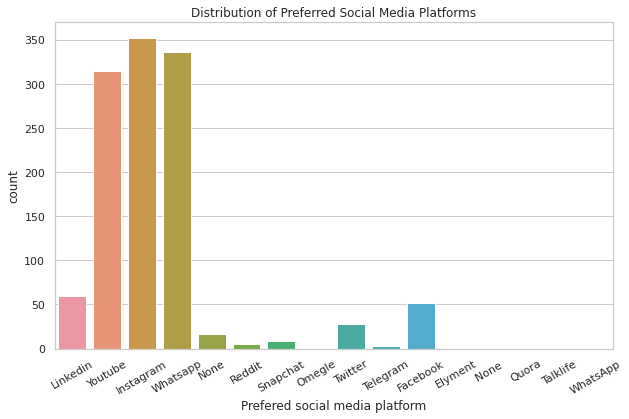

Unique values of Prefered social media platform:
Linkedin
Youtube
Instagram
Whatsapp
None
Reddit
Snapchat
Omegle
Twitter
Telegram
Facebook
Elyment
None 
Quora
Talklife
WhatsApp

Counts of each unique platform: 
Instagram    352
Whatsapp     336
Youtube      314
Linkedin      60
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
WhatsApp       1
Name: Prefered social media platform, dtype: int64


/tmp/ipykernel_1319/3177274403.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpd.replace(replacing_map3, inplace=True)


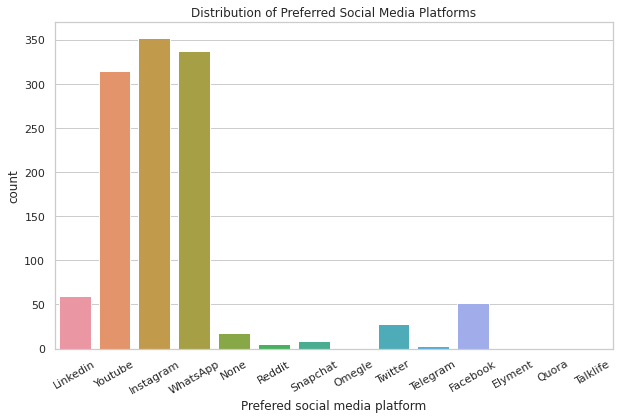

Unique values of Prefered social media platform:
Linkedin
Youtube
Instagram
WhatsApp
None
Reddit
Snapchat
Omegle
Twitter
Telegram
Facebook
Elyment
Quora
Talklife

Counts of each unique platform: 
Instagram    352
WhatsApp     337
Youtube      314
Linkedin      60
Facebook      52
Twitter       28
None          18
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
Quora          1
Talklife       1
Name: Prefered social media platform, dtype: int64


In [70]:
#Distribution before using the Replace function
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
sns.countplot(data=dfpd, x='Prefered social media platform')
plt.title('Distribution of Preferred Social Media Platforms')
plt.xticks(rotation=30)
plt.show()
unique_time3_2 = dfpd['Prefered social media platform'].unique()
time_counts3_2 = dfpd['Prefered social media platform'].value_counts()
#Print unique rows miss
print("Unique values of Prefered social media platform:")
for time3_2 in unique_time3_2:
    print(time3_2)
#Print counts of each unique rows of miss
print("\nCounts of each unique platform: ")
print(time_counts3_2)

#Replace function on Preferred social media platform
replacing_map3 = {'Prefered social media platform':
   {'WhatsApp': 'WhatsApp',
    'Whatsapp': 'WhatsApp',
    'None': 'None',
    'None ': 'None',
}}

dfpd.replace(replacing_map3, inplace=True)


#Distribution after using the Replace function
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
sns.countplot(data=dfpd, x='Prefered social media platform')
plt.title('Distribution of Preferred Social Media Platforms')
plt.xticks(rotation=30)
plt.show()
unique_time3 = dfpd['Prefered social media platform'].unique()
time_counts3 = dfpd['Prefered social media platform'].value_counts()
#Print unique rows miss
print("Unique values of Prefered social media platform:")
for time3 in unique_time3:
    print(time3)
#Print counts of each unique rows of miss
print("\nCounts of each unique platform: ")
print(time_counts3)

In [71]:
# Renaming columns to keep consistency
dfpd.info()
dfpd.rename(columns=
   {'Region of residence': 'Region Of Residence',
    'Age of Subject': 'Age Of Subject',
    'Time spent on Online Class': 'Time Spent On Online Class',
    'Rating of Online Class experience': 'Rating Of Online Class Experience',
    'Medium for online class': 'Medium For Online Class',
    'Time spent on self study': 'Time Spent On Self Study',
    'Time spent on fitness': 'Time Spent On Fitness',
    'Time spent on sleep': 'Time Spent On Sleep',
    'Time spent on social media': 'Time Spent On Social Media',
    'Prefered social media platform': 'Preferred Social Media Platform',
    'Time spent on TV': 'Time Spent On TV',
    'Number of meals per day': 'Number Of Meals Per Day',
    'Change in your weight': 'Change In Weight',
    'Health issue during lockdown': 'Health Issue During Lockdown',
    'Stress busters': 'Stress Busters',
    'Time utilized': 'Time Utilized',
    'Do you find yourself more connected with your family, close friends , relatives  ?': 'Connection Status',
    'What you miss the most': 'Activities Missed (Most)'
}, inplace=True)
dfpd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1181 non-null   object 
 1   Region of residence                                                                 1181 non-null   object 
 2   Age of Subject                                                                      1181 non-null   int64  
 3   Time spent on Online Class                                                          1181 non-null   float64
 4   Rating of Online Class experience                                                   1181 non-null   object 
 5   Medium for online class                                                             1181 non-null

/tmp/ipykernel_1319/474637493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpd.rename(columns=


## Step 3.3: Data Construction

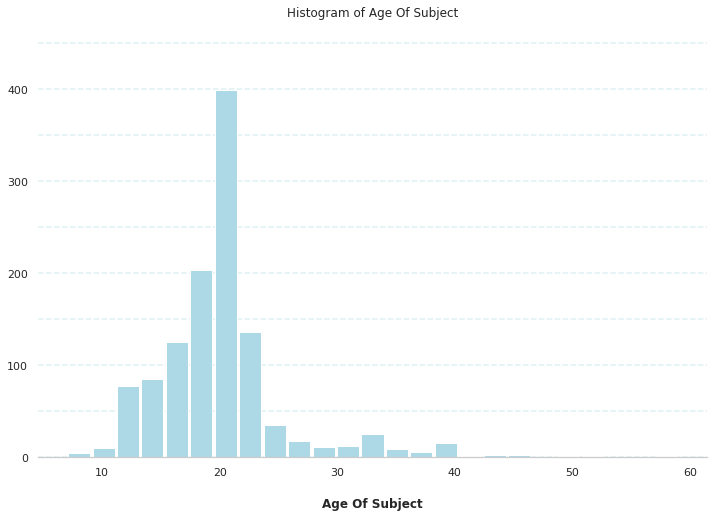

In [72]:
#Age Of Subject Histogram
hist = dfpd.hist(column='Age Of Subject', bins=25, grid=False, figsize=(12,8),
color='#ADD8E6', zorder=2, rwidth=0.9)
hist = hist[0]
for x1 in hist:
    # Despine
    x1.spines['right'].set_visible(False)
    x1.spines['top'].set_visible(False)
    x1.spines['left'].set_visible(False)
    # Drawing the lines for horizontal (x) axis
    vals = x1.get_yticks()
    for tick in vals:
        x1.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#ADD8E6', zorder=1)
    # Create title
    x1.set_title("Histogram of Age Of Subject")
    # Create x label
    x1.set_xlabel("Age Of Subject", labelpad=20, weight='bold', size=12)

In [73]:
# Construct a new variable: Age Group
bins = [0, 13, 20, 30, 45, 60]
labels = ['Children', 'Pre-Teens', 'Young Adults', 'Adults', 'Middle-Aged Adults']
dfpd['Age Group'] = pd.cut(dfpd['Age Of Subject'], bins=bins, labels=labels,
right=False)
dfpd['Age Group'].head(10)

/tmp/ipykernel_1319/3950773440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpd['Age Group'] = pd.cut(dfpd['Age Of Subject'], bins=bins, labels=labels,


0    Young Adults
1    Young Adults
2    Young Adults
3    Young Adults
4    Young Adults
5    Young Adults
6       Pre-Teens
7       Pre-Teens
8    Young Adults
9    Young Adults
Name: Age Group, dtype: category
Categories (5, object): ['Children' < 'Pre-Teens' < 'Young Adults' < 'Adults' < 'Middle-Aged Adults']

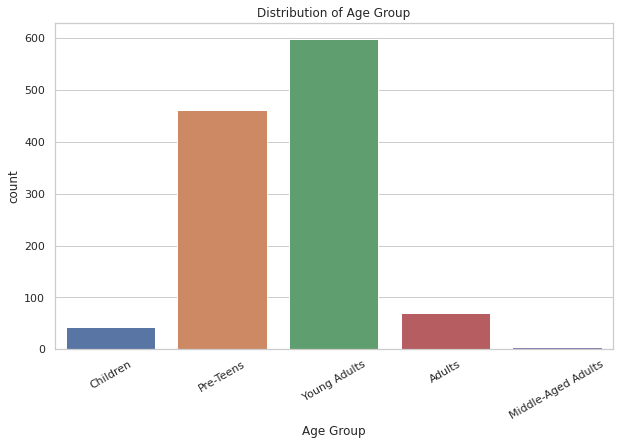

In [74]:
#Distribution of Age Group
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
sns.countplot(data=dfpd, x='Age Group')
plt.title('Distribution of Age Group')
plt.xticks(rotation=30)
plt.show()

In [75]:
# Quick inspection of the current data frame
dfpd

,ID,Region Of Residence,Age Of Subject,Time Spent On Online Class,Rating Of Online Class Experience,Medium For Online Class,Time Spent On Self Study,Time Spent On Fitness,Time Spent On Sleep,Time Spent On Social Media,Preferred Social Media Platform,Time Spent On TV,Number Of Meals Per Day,Change In Weight,Health Issue During Lockdown,Stress Busters,Time Utilized,Connection Status,Activities Missed (Most),Age Group
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Leisure and Entertainment,YES,YES,Education,Young Adults
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Social Media,YES,NO,Personal Exploration,Young Adults
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Leisure and Entertainment,NO,YES,Travel and Exploration,Young Adults
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching videos,NO,NO,Social Interactions,Young Adults
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travel and Exploration,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2.0,3,Decreased,NO,Exercise,YES,YES,Travel and Exploration,Children
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,WhatsApp,1.0,4,Remain Constant,NO,Leisure and Entertainment,YES,YES,Social Interactions,Pre-Teens
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2.0,4,Decreased,NO,Gaming,NO,YES,Education,Pre-Teens
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1.0,4,Remain Constant,NO,Reading books,YES,YES,Education,Pre-Teens


## Step 3.4: Data Integration

In [76]:
# Exporting dfpd data frame as a csv file to perform the data integration process
dfpd.to_csv("./Datasets/Cleaned_df.csv")

In [77]:
# Merging the two files 'dfpd3' and 'dfpd4' together on the joining key 'ID' and then dropping it after the join is complete
dfpd3 = pd.read_csv("./Datasets/COVID-19 Survey Student Responses Merge a.csv")
dfpd4 = pd.read_csv("./Datasets/COVID-19 Survey Student Responses Merge b.csv")
merged_df = dfpd3.merge(dfpd4, on="ID")
merged_df = merged_df.drop(["ID"], axis = 1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1180
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region Of Residence                1181 non-null   object 
 1   Age Of Subject                     1181 non-null   int64  
 2   Time Spent On Online Class         1181 non-null   float64
 3   Rating Of Online Class Experience  1157 non-null   object 
 4   Medium For Online Class            1130 non-null   object 
 5   Time Spent On Self Study           1181 non-null   float64
 6   Time Spent On Fitness              1181 non-null   float64
 7   Time Spent On Sleep                1181 non-null   float64
 8   Time Spent On Social Media         1181 non-null   float64
 9   Preferred Social Media Platform    1181 non-null   object 
 10  Time Spent On TV                   1181 non-null   float64
 11  Number Of Meals Per Day            1181 non-null   int64

In [78]:
# Replacing the nan values with NA values for these two columns after importing the merged files
merged_df["Rating Of Online Class Experience"].replace(np.nan, 'NA', inplace=True)
merged_df["Medium For Online Class"].replace(np.nan, 'NA', inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1180
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region Of Residence                1181 non-null   object 
 1   Age Of Subject                     1181 non-null   int64  
 2   Time Spent On Online Class         1181 non-null   float64
 3   Rating Of Online Class Experience  1181 non-null   object 
 4   Medium For Online Class            1181 non-null   object 
 5   Time Spent On Self Study           1181 non-null   float64
 6   Time Spent On Fitness              1181 non-null   float64
 7   Time Spent On Sleep                1181 non-null   float64
 8   Time Spent On Social Media         1181 non-null   float64
 9   Preferred Social Media Platform    1181 non-null   object 
 10  Time Spent On TV                   1181 non-null   float64
 11  Number Of Meals Per Day            1181 non-null   int64

In [79]:
# Checking the data
merged_df

,Region Of Residence,Age Of Subject,Time Spent On Online Class,Rating Of Online Class Experience,Medium For Online Class,Time Spent On Self Study,Time Spent On Fitness,Time Spent On Sleep,Time Spent On Social Media,Preferred Social Media Platform,Time Spent On TV,Number Of Meals Per Day,Change In Weight,Health Issue During Lockdown,Stress Busters,Time Utilized,Connection Status,Activities Missed (Most),Age Group
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Leisure and Entertainment,YES,YES,Education,Young Adults
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Social Media,YES,NO,Personal Exploration,Young Adults
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Leisure and Entertainment,NO,YES,Travel and Exploration,Young Adults
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching videos,NO,NO,Social Interactions,Young Adults
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travel and Exploration,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2.0,3,Decreased,NO,Exercise,YES,YES,Travel and Exploration,Children
1177,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,WhatsApp,1.0,4,Remain Constant,NO,Leisure and Entertainment,YES,YES,Social Interactions,Pre-Teens
1178,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2.0,4,Decreased,NO,Gaming,NO,YES,Education,Pre-Teens
1179,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1.0,4,Remain Constant,NO,Reading books,YES,YES,Education,Pre-Teens


# Step 4: Data Transformation

## Step 4.1 Data Reduction

In [80]:
# Adding a Gender variable
merged_df["Gender"] = np.random.randint(2, size=len(merged_df))
merged_df

,Region Of Residence,Age Of Subject,Time Spent On Online Class,Rating Of Online Class Experience,Medium For Online Class,Time Spent On Self Study,Time Spent On Fitness,Time Spent On Sleep,Time Spent On Social Media,Preferred Social Media Platform,Time Spent On TV,Number Of Meals Per Day,Change In Weight,Health Issue During Lockdown,Stress Busters,Time Utilized,Connection Status,Activities Missed (Most),Age Group,Gender
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Leisure and Entertainment,YES,YES,Education,Young Adults,0
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Social Media,YES,NO,Personal Exploration,Young Adults,0
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Leisure and Entertainment,NO,YES,Travel and Exploration,Young Adults,1
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching videos,NO,NO,Social Interactions,Young Adults,1
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travel and Exploration,Young Adults,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2.0,3,Decreased,NO,Exercise,YES,YES,Travel and Exploration,Children,0
1177,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,WhatsApp,1.0,4,Remain Constant,NO,Leisure and Entertainment,YES,YES,Social Interactions,Pre-Teens,1
1178,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2.0,4,Decreased,NO,Gaming,NO,YES,Education,Pre-Teens,0
1179,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1.0,4,Remain Constant,NO,Reading books,YES,YES,Education,Pre-Teens,1


In [81]:
# Download merged_df dataframe as csv file
merged_df.to_csv("./Datasets/final_df.csv")

In [82]:
# Import the final cleaned dataset called merged_df back into Jupyter Notebook as a PySpark dataframe
final_df = spark.read.csv("./Datasets/final_df.csv", header="true")

In [83]:
# Checking the PySpark dataframe
final_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- Region Of Residence: string (nullable = true)
 |-- Age Of Subject: string (nullable = true)
 |-- Time Spent On Online Class: string (nullable = true)
 |-- Rating Of Online Class Experience: string (nullable = true)
 |-- Medium For Online Class: string (nullable = true)
 |-- Time Spent On Self Study: string (nullable = true)
 |-- Time Spent On Fitness: string (nullable = true)
 |-- Time Spent On Sleep: string (nullable = true)
 |-- Time Spent On Social Media: string (nullable = true)
 |-- Preferred Social Media Platform: string (nullable = true)
 |-- Time Spent On TV: string (nullable = true)
 |-- Number Of Meals Per Day: string (nullable = true)
 |-- Change In Weight: string (nullable = true)
 |-- Health Issue During Lockdown: string (nullable = true)
 |-- Stress Busters: string (nullable = true)
 |-- Time Utilized: string (nullable = true)
 |-- Connection Status: string (nullable = true)
 |-- Activities Missed (Most): string (nullable = tru

In [84]:
# Dropping the ID column '_c0' from the dataframe 'final_df'
final_df = final_df.drop("_c0")

In [85]:
# Issues with running the ChiSqSelector to get the best feature selection from using PySpark library - Attempt 1
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, ChiSqSelector, StringIndexer
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

# Initialize a Spark session
# spark = SparkSession.builder.appName("FeatureSelectionExample").getOrCreate()

# Specify the columns to be used as features
feature_columns = [
    "Age Of Subject",
    "Time Spent On Online Class",
    "Rating Of Online Class Experience",
    "Medium For Online Class",
    "Time Spent On Self Study",
    "Time Spent On Fitness",
    "Time Spent On Sleep",
    "Time Spent On Social Media",
    "Preferred Social Media Platform",
    "Time Spent On TV",
    "Number Of Meals Per Day",
    "Change In Weight",
    "Health Issue During Lockdown",
    "Stress Busters",
    "Time Utilized",
    "Connection Status",
    "Activities Missed (Most)",
    "Age Group",
    "Gender"
]

# Create a list to store StringIndexer stages
indexers = []

# Iterate through the string columns and create StringIndexer for each
for col_name in feature_columns:
    indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index")
    indexers.append(indexer)
    
# Assemble the indexed features into a vector
assembler = VectorAssembler(inputCols=[f"{col_name}_index" for col_name in feature_columns], outputCol="features")

# Create a pipeline to sequentially apply transformations
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + [assembler])

# Fit the pipeline to the data and transform it
model = pipeline.fit(final_df)
df_transformed = model.transform(final_df)

# Create a ChiSqSelector to select the top k features based on chi-squared test
selector = ChiSqSelector(numTopFeatures=5, featuresCol="features", outputCol="selectedFeatures")

# Fit the selector to the data
model = selector.fit(df_transformed)

# Transform the data to select the top k features
result = model.transform(df_transformed)

# Show the selected features
result.select("Region Of Residence", "selectedFeatures").show()

IllegalArgumentException: label does not exist. Available: Region Of Residence, Age Of Subject, Time Spent On Online Class, Rating Of Online Class Experience, Medium For Online Class, Time Spent On Self Study, Time Spent On Fitness, Time Spent On Sleep, Time Spent On Social Media, Preferred Social Media Platform, Time Spent On TV, Number Of Meals Per Day, Change In Weight, Health Issue During Lockdown, Stress Busters, Time Utilized, Connection Status, Activities Missed (Most), Age Group, Gender, Age Of Subject_index, Time Spent On Online Class_index, Rating Of Online Class Experience_index, Medium For Online Class_index, Time Spent On Self Study_index, Time Spent On Fitness_index, Time Spent On Sleep_index, Time Spent On Social Media_index, Preferred Social Media Platform_index, Time Spent On TV_index, Number Of Meals Per Day_index, Change In Weight_index, Health Issue During Lockdown_index, Stress Busters_index, Time Utilized_index, Connection Status_index, Activities Missed (Most)_index, Age Group_index, Gender_index, features

In [86]:
# Poor readability in obtaining the ChiSqSelector from using the PySpark library
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, ChiSqSelector
from pyspark.sql.functions import lit

# Initialize a Spark session
# spark = SparkSession.builder.appName("FeatureSelectionExample").getOrCreate()

# Specify the columns to be used as features
feature_columns = [
    "Age Of Subject",
    "Time Spent On Online Class",
    "Rating Of Online Class Experience",
    "Medium For Online Class",
    "Time Spent On Self Study",
    "Time Spent On Fitness",
    "Time Spent On Sleep",
    "Time Spent On Social Media",
    "Preferred Social Media Platform",
    "Time Spent On TV",
    "Number Of Meals Per Day",
    "Change In Weight",
    "Health Issue During Lockdown",
    "Stress Busters",
    "Time Utilized",
    "Connection Status",
    "Activities Missed (Most)",
    "Age Group",
    "Gender"
]

# Create a list to store StringIndexer stages
indexers = []

# Iterate through the string columns and create StringIndexer for each
for col_name in feature_columns:
    indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index")
    indexers.append(indexer)

# Assemble the indexed features into a vector
assembler = VectorAssembler(inputCols=[f"{col_name}_index" for col_name in feature_columns], outputCol="features")

# Create a constant label column
df_with_label = final_df.withColumn("label", lit(0))

# Create a pipeline to sequentially apply transformations
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + [assembler])

# Fit the pipeline to the data and transform it
model = pipeline.fit(df_with_label)
df_transformed = model.transform(df_with_label)

# Create a ChiSqSelector to select the top k features based on chi-squared test
selector = ChiSqSelector(numTopFeatures=5, featuresCol="features", outputCol="selectedFeatures")

# Fit the selector to the data
model = selector.fit(df_transformed)

# Transform the data to select the top k features
result = model.transform(df_transformed)

# Show the selected features
selected_columns = [col_name for col_name in feature_columns if col_name != "Region Of Residence"]
result.select("Region Of Residence", *selected_columns).show()

# Remove the temporary label column
result = result.drop("label")

+-------------------+--------------+--------------------------+---------------------------------+-----------------------+------------------------+---------------------+-------------------+--------------------------+-------------------------------+----------------+-----------------------+----------------+----------------------------+--------------------+-------------+-----------------+------------------------+------------+------+
|Region Of Residence|Age Of Subject|Time Spent On Online Class|Rating Of Online Class Experience|Medium For Online Class|Time Spent On Self Study|Time Spent On Fitness|Time Spent On Sleep|Time Spent On Social Media|Preferred Social Media Platform|Time Spent On TV|Number Of Meals Per Day|Change In Weight|Health Issue During Lockdown|      Stress Busters|Time Utilized|Connection Status|Activities Missed (Most)|   Age Group|Gender|
+-------------------+--------------+--------------------------+---------------------------------+-----------------------+-------------

Unnamed: 0: 8.503667
Age Of Subject: 10.124104
Time Spent On Online Class: 6.069475
Time Spent On Self Study: 0.253953
Time Spent On Fitness: 0.005917
Time Spent On Sleep: 0.024518
Time Spent On Social Media: 3.114502
Time Spent On TV: 2.225406
Number Of Meals Per Day: 0.153588
Gender: 0.078812
Rating Of Online Class Experience_Excellent: 1.634171
Rating Of Online Class Experience_Good: 0.536118
Rating Of Online Class Experience_Poor: 7.500887
Rating Of Online Class Experience_Very poor: 0.204331
Medium For Online Class_Laptop/Desktop: 1.248934
Medium For Online Class_Smartphone: 0.713088
Medium For Online Class_Smartphone or Laptop/Desktop: 3.543253
Medium For Online Class_Tablet: 1.322817
Preferred Social Media Platform_Facebook: 4.852392
Preferred Social Media Platform_Instagram: 0.009588
Preferred Social Media Platform_Linkedin: 0.027816
Preferred Social Media Platform_None: 0.228518
Preferred Social Media Platform_Omegle: 0.638003
Preferred Social Media Platform_Quora: 1.567391
Pr

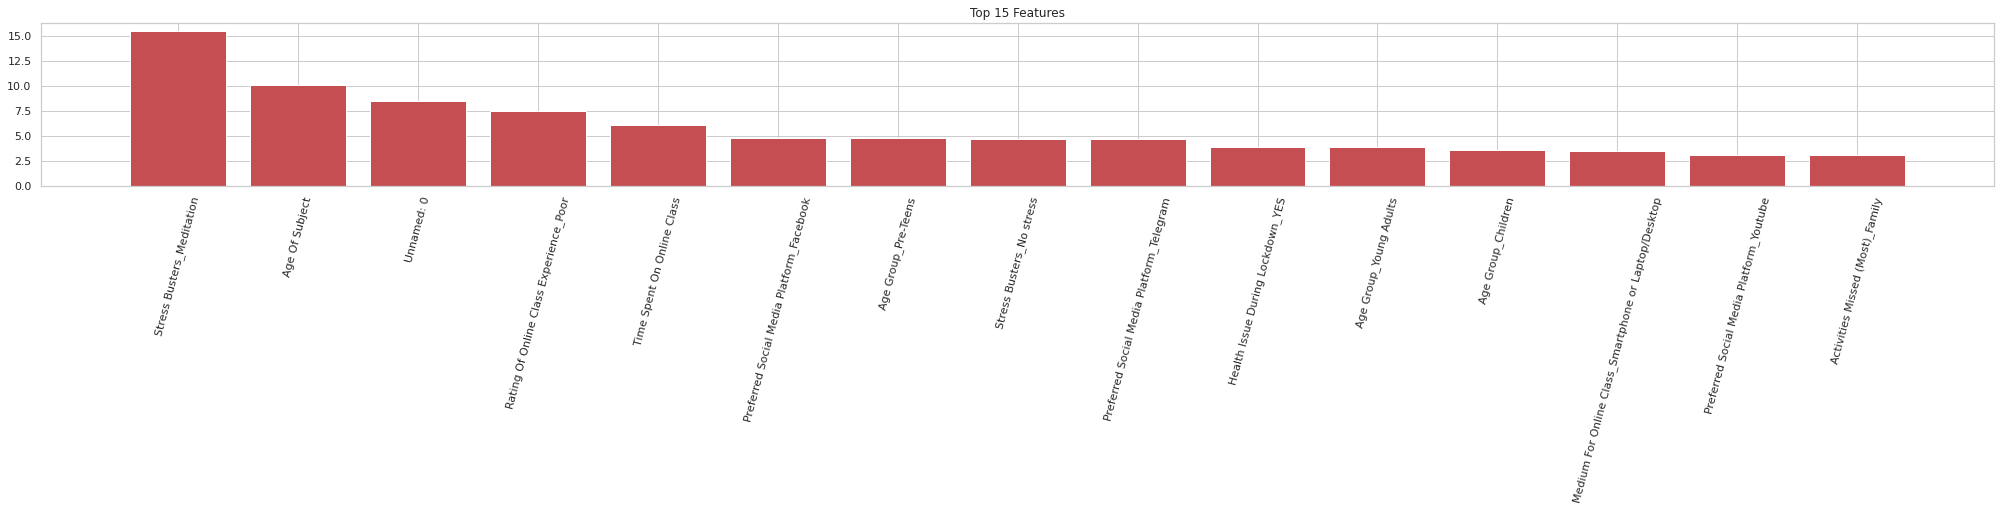

In [87]:
# We will use SelectKBest and chi2 to find the most significant variables from using the Pandas library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd

finalpd_df = pd.read_csv("./Datasets/final_df.csv")

# Extract the target variable
y = finalpd_df["Region Of Residence"]

# Drop the columns that won't be used as features
X = finalpd_df.drop("Region Of Residence", axis=1)

# Perform one-hot encoding on categorical columns
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Produce and print scores for each feature using SelectKBest
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X_encoded, y)

# Print feature scores
for i in range(len(sf_fit.scores_)):
    print('%s: %f' % (X_encoded.columns[i], sf_fit.scores_[i]))

# Visualize the scores
import matplotlib.pyplot as plt

indices = np.argsort(sf_fit.scores_)[::-1]
top_features = 15  # Number of top features to display
features = X_encoded.columns[indices[:top_features]]

plt.figure(figsize=(35, 3))
plt.bar(features, sf_fit.scores_[indices[:top_features]], color='r', align='center')
plt.xticks(rotation=75)
plt.title(f'Top {top_features} Features')
plt.show()

In [88]:
# Checking the column values of 'Unnamed: 0'
finalpd_df['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
1176    1176
1177    1177
1178    1178
1179    1179
1180    1180
Name: Unnamed: 0, Length: 1181, dtype: int64

In [89]:
# Dropping the column 'Unnamed: 0'
finalpd_df = finalpd_df.drop("Unnamed: 0", axis=1)

Age Of Subject: 10.124104
Time Spent On Online Class: 6.069475
Time Spent On Self Study: 0.253953
Time Spent On Fitness: 0.005917
Time Spent On Sleep: 0.024518
Time Spent On Social Media: 3.114502
Time Spent On TV: 2.225406
Number Of Meals Per Day: 0.153588
Gender: 0.078812
Rating Of Online Class Experience_Excellent: 1.634171
Rating Of Online Class Experience_Good: 0.536118
Rating Of Online Class Experience_Poor: 7.500887
Rating Of Online Class Experience_Very poor: 0.204331
Medium For Online Class_Laptop/Desktop: 1.248934
Medium For Online Class_Smartphone: 0.713088
Medium For Online Class_Smartphone or Laptop/Desktop: 3.543253
Medium For Online Class_Tablet: 1.322817
Preferred Social Media Platform_Facebook: 4.852392
Preferred Social Media Platform_Instagram: 0.009588
Preferred Social Media Platform_Linkedin: 0.027816
Preferred Social Media Platform_None: 0.228518
Preferred Social Media Platform_Omegle: 0.638003
Preferred Social Media Platform_Quora: 1.567391
Preferred Social Media 

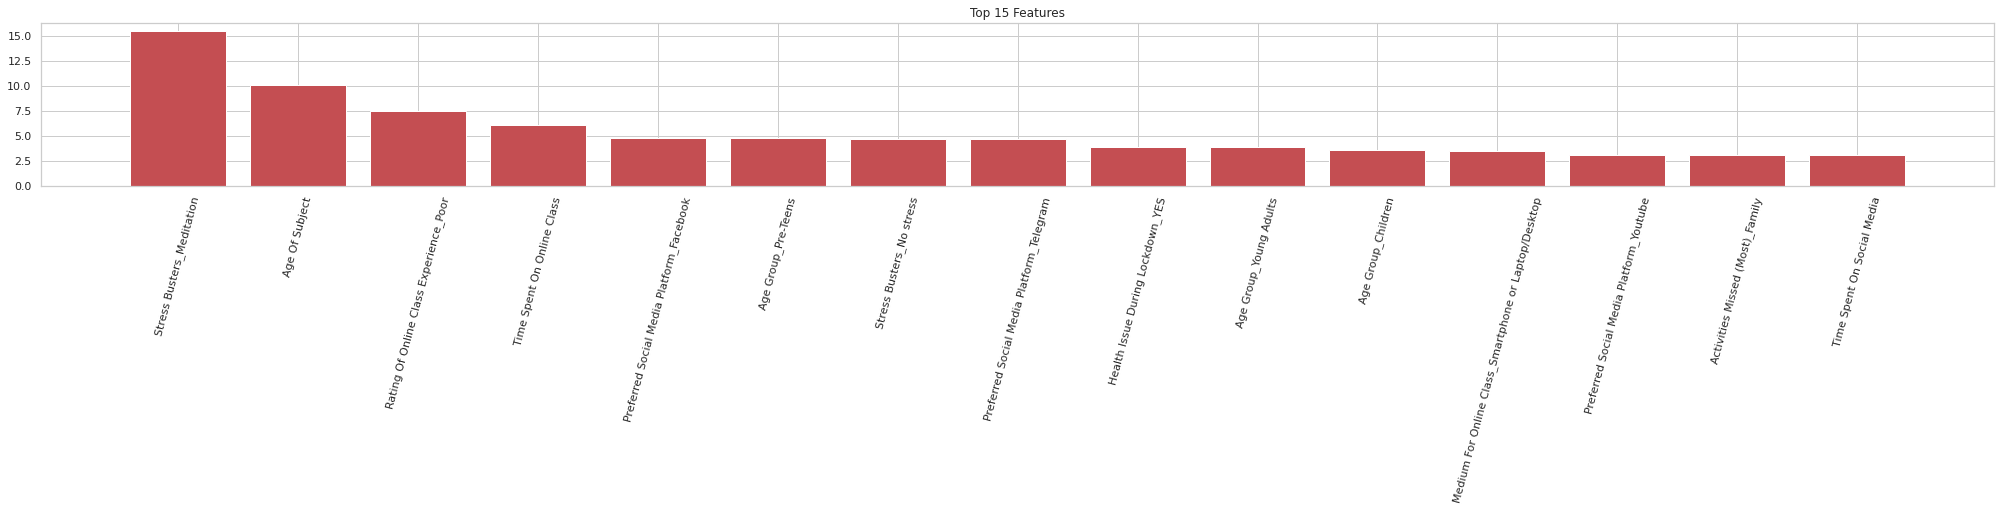

In [90]:
# The column 'Unnamed: 0' that shows in the output likely represents the index of the DataFrame 
    # that was saved to the CSV file. 
# When we save a DataFrame to a CSV file and then later read it back into pandas, by default, 
    # pandas saves the index as a separate column in the CSV file.

# In the code, we read the data from a CSV file using finalpd_df = pd.read_csv("./Datasets/final_df.csv"). 
# If the CSV file was saved with the DataFrame's index, we will see a column labeled 'Unnamed: 0' in our DataFrame, 
    # which contains the index values. This column may not be useful as a feature in our analysis.
    # So we have decided to remove it from our analysis.
    
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd

# Extract the target variable
y = finalpd_df["Region Of Residence"]

# Drop the columns that won't be used as features
X = finalpd_df.drop("Region Of Residence", axis=1)

# Perform one-hot encoding on categorical columns
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Produce and print scores for each feature using SelectKBest
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X_encoded, y)

# Print feature scores
for i in range(len(sf_fit.scores_)):
    print('%s: %f' % (X_encoded.columns[i], sf_fit.scores_[i]))

# Visualize the scores
import matplotlib.pyplot as plt

indices = np.argsort(sf_fit.scores_)[::-1]
top_features = 15  # Number of top features to display
features = X_encoded.columns[indices[:top_features]]

plt.figure(figsize=(35, 3))
plt.bar(features, sf_fit.scores_[indices[:top_features]], color='r', align='center')
plt.xticks(rotation=75)
plt.title(f'Top {top_features} Features')
plt.show()

In [97]:
# New data frame 'Fixedfinal_df' to hold our initial feature selection 
# Used in Section 6 and subsequent models
Fixedfinal_df = finalpd_df.drop(
    ["Time Spent On Self Study",
     "Time Spent On Fitness",
     "Time Spent On Sleep",
     "Time Spent On TV",
     "Number Of Meals Per Day",
     "Gender",
     "Change In Weight",
     "Time Utilized",
     "Connection Status",
    ], axis=1)
Fixedfinal_df['Rating Of Online Class Experience'].replace(np.nan, 'NA', inplace=True)
Fixedfinal_df['Medium For Online Class'].replace(np.nan, 'NA', inplace=True)
Fixedfinal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region Of Residence                1181 non-null   object 
 1   Age Of Subject                     1181 non-null   int64  
 2   Time Spent On Online Class         1181 non-null   float64
 3   Rating Of Online Class Experience  1181 non-null   object 
 4   Medium For Online Class            1181 non-null   object 
 5   Time Spent On Social Media         1181 non-null   float64
 6   Preferred Social Media Platform    1181 non-null   object 
 7   Health Issue During Lockdown       1181 non-null   object 
 8   Stress Busters                     1181 non-null   object 
 9   Activities Missed (Most)           1181 non-null   object 
 10  Age Group                          1181 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 101.6+ 

## Step 4.2 Data Projection

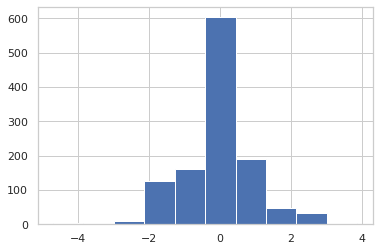

In [94]:
from sklearn.preprocessing import PowerTransformer
# Statistical transformations: Transformation on Age Of Subject
# Instantiate PowerTransformer
pow_trans = PowerTransformer()
# Train the transform on the data - demonstration purpose only
pow_trans.fit(Fixedfinal_df[['Age Of Subject']])
# Apply the power transform to the data
Fixedfinal_df['Age Of Subject'] = pow_trans.transform(Fixedfinal_df[['Age Of Subject']])
pyplot.hist(Fixedfinal_df['Age Of Subject'])
pyplot.show()

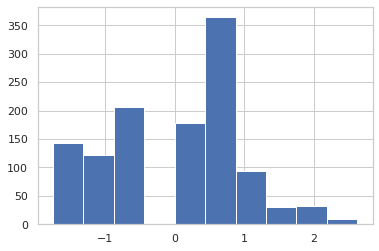

In [95]:
#Transformation on Time Spent On Online Class
# Instantiate PowerTransformer
pow_trans = PowerTransformer()
# Train the transform on the data - demonstration purpose only
pow_trans.fit(Fixedfinal_df[['Time Spent On Online Class']])
# Apply the power transform to the data
Fixedfinal_df['Time Spent On Online Class'] = pow_trans.transform(Fixedfinal_df[['Time Spent On Online Class']])
pyplot.hist(Fixedfinal_df['Time Spent On Online Class'])
pyplot.show()

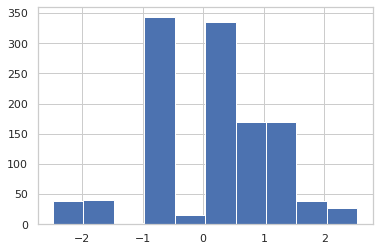

In [96]:
#Transformation on Time Spent On Social Media
# Instantiate PowerTransformer
pow_trans = PowerTransformer()
# Train the transform on the data - demonstration purpose only
pow_trans.fit(Fixedfinal_df[['Time Spent On Social Media']])
# Apply the power transform to the data
Fixedfinal_df['Time Spent On Social Media'] = pow_trans.transform(Fixedfinal_df[['Time Spent On Social Media']])
pyplot.hist(Fixedfinal_df['Time Spent On Social Media'])
pyplot.show()

# Step 5: Data-Mining Method(s) Selection

##### Please refer to page 48 for the discussion as coding is not required in this section.